In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_class_weight
import joblib
from sklearn.metrics import accuracy_score

# Read and Analyze the data

In [2]:
#Read the data
df=pd.read_csv('parkinsons.data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


- name: The name of the individual participating in the study
- MDVP:Fo(Hz): Fundamental frequency measurement of the voice (in Hz)
- MDVP:Fhi(Hz): Maximum fundamental frequency variation (in Hz)
- MDVP:Flo(Hz): Minimum fundamental frequency variation (in Hz)
- MDVP:Jitter(%): Percentage of variation in fundamental frequency
- MDVP:Jitter(Abs): Absolute value of jitter in fundamental frequency (in ms)
- MDVP:RAP: Measure of variation in fundamental frequency over consecutive speech frames (in ms)
- MDVP:PPQ: Similar to MDVP:RAP, but for period perturbation quotient
- Jitter:DDP: Average of absolute differences between consecutive jitter cycles (in ms)
- MDVP:Shimmer: Measure of variation in amplitude of speech signal
- MDVP:Shimmer(dB): Same as MDVP:Shimmer, but in decibels
- Shimmer:APQ3: Amplitude perturbation quotient, measuring variation in amplitude within the first 3 harmonics of a spectrum
- Shimmer:APQ5: Amplitude perturbation quotient, measuring variation in amplitude within the first 5 harmonics of a spectrum
- MDVP:APQ: Similar to Shimmer:APQ, but for frequency perturbation quotient
- Shimmer:DDA: Average of absolute differences between consecutive amplitude cycles
- NHR: Noise to harmonic ratio
- HNR: Harmonic to noise ratio
- status: Health status of the subject (0: Healthy, 1: Parkinson's)
- RPDE: Recurrence period density entropy measure
- DFA: Detrended fluctuation analysis measure
- spread1: Nonlinear measure of fundamental frequency variation
- spread2: Nonlinear measure of amplitude variation
- D2: Nonlinear measure of correlation between 2 consecutive periods
- PPE: Pitch period entropy, a nonlinear measure of fundamental frequency variation.


In [4]:
#Data statstic
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
#Check if the data is clean from null
null_values=df.isnull().sum()
null_values.unique()

array([0], dtype=int64)

In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
df=df.drop(columns=['name'])
corr = df.corr()
corr.style.background_gradient() 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


spread1, spread2, D2, PPE are most related featuer 

In [9]:
df['status'].unique()  

array([1, 0], dtype=int64)

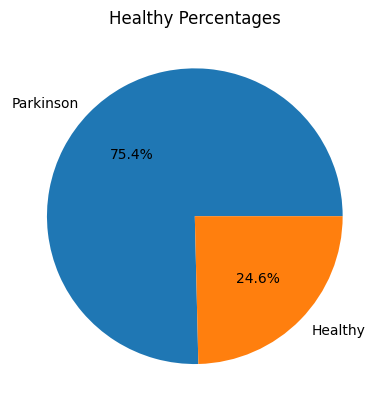

In [10]:
# Make pie chart for the Parkinson and Healthy
healthy_percentages = df['status'].value_counts() / len(df['status']) * 100
plt.pie(healthy_percentages, labels=['Parkinson','Healthy'], autopct='%1.1f%%')
plt.title('Healthy Percentages')
plt.show()


The data biases, which can lead to some problems with accuracy 

In [11]:
# Create two DataFrames based on the 'state' column
df_false = df[df['status'] == 0] #Healthy 
df_true = df[df['status'] == 1] # Parkinson

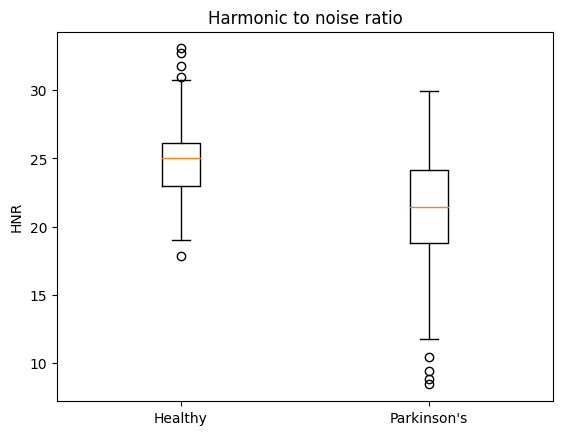

In [12]:
plt.boxplot([df_false['HNR'], df_true['HNR']], labels=['Healthy', "Parkinson's"])
plt.title('Harmonic to noise ratio')
plt.ylabel('HNR')
plt.show()

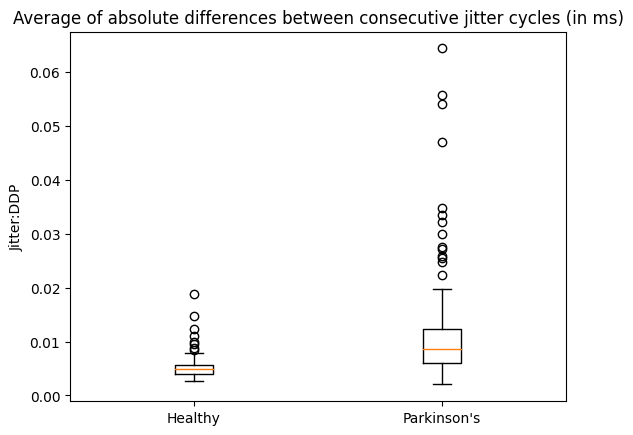

In [13]:
plt.boxplot([df_false['Jitter:DDP'], df_true['Jitter:DDP']], labels=['Healthy', "Parkinson's"])
plt.title('Average of absolute differences between consecutive jitter cycles (in ms)')
plt.ylabel('Jitter:DDP')
plt.show()

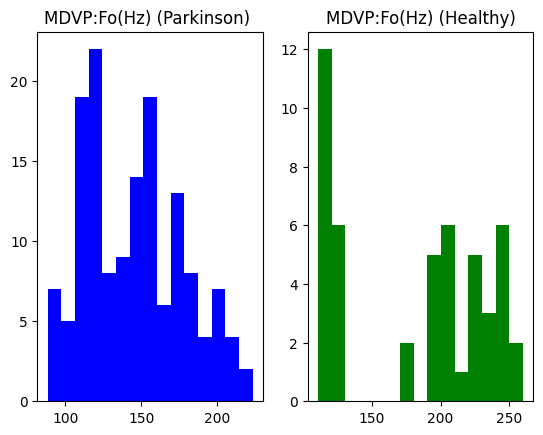

In [14]:
#Comparing between Fundamental frequency measurement of the voice for healthy and Parkinson

import numpy as np

# Plot the histograms side by side
plt.subplot(1, 2, 1)  # create subplot 1
plt.hist(df_true['MDVP:Fo(Hz)'], bins=15, color='blue')  
plt.title('MDVP:Fo(Hz) (Parkinson) ')

plt.subplot(1, 2, 2)  # create subplot 2
plt.hist(df_false['MDVP:Fo(Hz)'], bins=15, color='green') 
plt.title('MDVP:Fo(Hz) (Healthy)')
  
plt.show()   

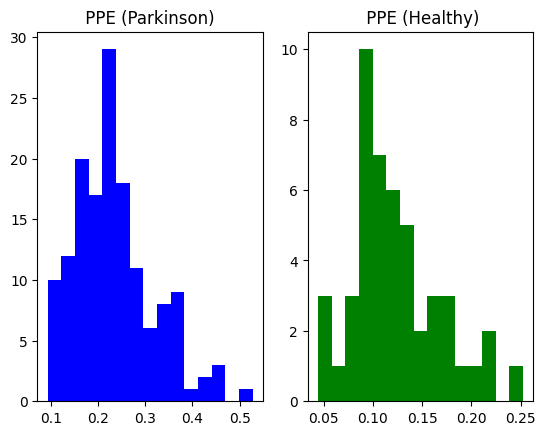

In [15]:
#Comparing between Pitch period entropyfor healthy and Parkinson

plt.subplot(1, 2, 1) 
plt.hist(df_true['PPE'], bins=15, color='blue')  
plt.title(' PPE (Parkinson) ')

plt.subplot(1, 2, 2) 
plt.hist(df_false['PPE'], bins=15, color='green') 
plt.title(' PPE (Healthy)')
  
plt.show() 

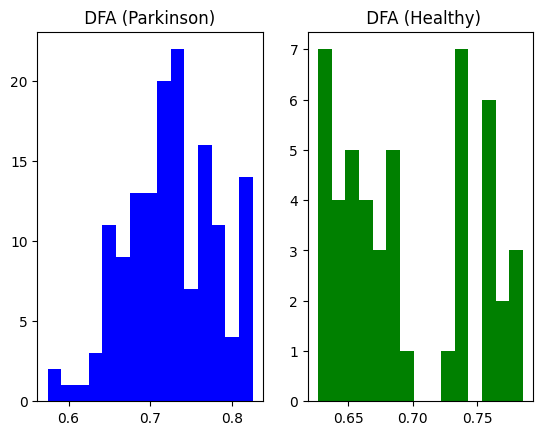

In [16]:
#Comparing between Detrended fluctuation analysis measure for healthy and Parkinson

plt.subplot(1, 2, 1) 
plt.hist(df_true['DFA'], bins=15, color='blue')  
plt.title(' DFA (Parkinson) ')

plt.subplot(1, 2, 2)  
plt.hist(df_false['DFA'], bins=15, color='green') 
plt.title(' DFA (Healthy)')
  
plt.show() 

Some features have similar distribution

## Prepare the data

In [17]:
#Get the X and y split to train and test 
y = df.loc[:,'status']
X = df.drop(['status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [18]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Normalize class weights to sum to 1
class_weights /= class_weights.sum()


# Fit the model

In [19]:
# Define your Gaussian Naive Bayes model with the calculated priors
model = GaussianNB(priors=[class_weights[0], class_weights[1]])

# Train the model
model.fit(X_train, y_train)

GaussianNB(priors=[0.7628205128205129, 0.2371794871794872])

In [20]:
# Test the model's accuracy on the test set
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.74


In [21]:
# Save the model to a file
#joblib.dump(model, 'gaussian_nb_model.pkl')

# # To load the model later
# loaded_model = joblib.load('gaussian_nb_model.pkl')


### Use the model

In [22]:
# To load the model later
loaded_model = joblib.load('gaussian_nb_model.pkl')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [23]:
sample_row = df.iloc[44] 

X_sample = sample_row.drop(['status'])  

# Use the loaded model to make predictions on the sample
predicted_class = loaded_model.predict([X_sample])

if predicted_class == 0:
    print('Healthy')
else:
    print('You May have Parkinson ')

Healthy


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Try different model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [25]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y)

In [26]:


# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}



# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1  # You can increase verbosity for more information
)

# Perform the grid search
grid_search.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight={0: 2.03125,
                                                        1: 0.6632653061224489}),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy', verbose=1)

In [27]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

Best Parameters: {'C': 0.001, 'penalty': 'none'}
Best Cross-Validation Score: 0.79


# With featuer enginering 

In [28]:
#Get the X and y split to train and test 'NHR''MDVP:Fhi(Hz)',
y = df.loc[:,'status']
X = df.drop(['status', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',  'Shimmer:APQ5', 'MDVP:APQ',	'Shimmer:DDA', 'NHR','MDVP:Fhi(Hz)','HNR','MDVP:RAP','MDVP:PPQ','Jitter:DDP'], axis=1)

In [29]:
# Define the hyperparameter grid
param_grid = {
    'C': [ 0.01, 0.1, 1, 10, 100,110],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}



# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1  # You can increase verbosity for more information
)

# Perform the grid search
grid_search.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight={0: 2.03125,
                                                        1: 0.6632653061224489}),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 110],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy', verbose=1)

In [30]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

Best Parameters: {'C': 110, 'penalty': 'l2'}
Best Cross-Validation Score: 0.82


In [31]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:Shimmer', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

#### Fit all data, test and save 

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]},C=110,penalty='l2')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.79


In [33]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:Shimmer', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [34]:
joblib.dump(model, 'logistic_regression_model.pkl')

# To load the model later
loaded_model = joblib.load('logistic_regression_model.pkl')

In [38]:
X_sample = X.iloc[44] 
X_sample

MDVP:Fo(Hz)         243.439000
MDVP:Flo(Hz)        232.435000
MDVP:Jitter(%)        0.002100
MDVP:Jitter(Abs)      0.000009
MDVP:Shimmer          0.014190
RPDE                  0.438296
DFA                   0.635285
spread1              -7.057869
spread2               0.091608
D2                    2.330716
PPE                   0.091470
Name: 44, dtype: float64

In [36]:
# Use the loaded model to make predictions on the sample
predicted_class = loaded_model.predict([X_sample])

if predicted_class == 0:
    print('Healthy')
else:
    print('You May have Parkinson ')

Healthy


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
